<a href="https://colab.research.google.com/github/Je73hwg/1BM22CS046_MLLAB/blob/main/1BM22CS046LAb4_LR_MR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Predicted per capita income for Canada in 2020: 41288.69409441762


Slope: 828.4650752227104
Intercept: -1632210.7578554575


Mean Squared Error (MSE): 15462739.061504772
Mean Absolute Error (MAE): 3088.866427771443
R-squared (R²): 0.890916917957032




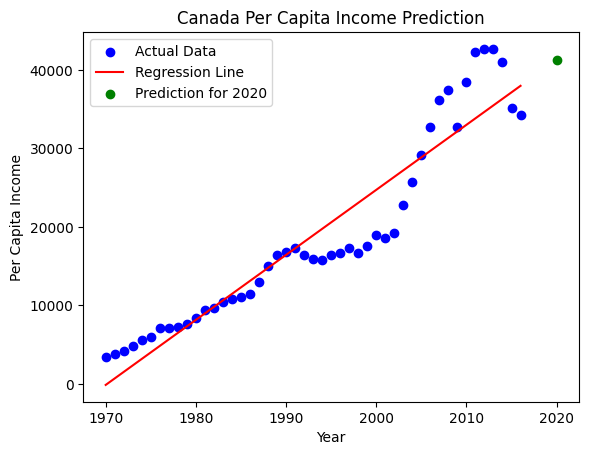

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('canada_per_capita_income.csv')

# Prepare the data
df.columns = ['year', 'income']  # Rename columns for clarity
df['year'] = pd.to_numeric(df['year'])  # Ensure year column is numeric
df['income'] = pd.to_numeric(df['income'])

# Create the linear regression model
model = LinearRegression()
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

# Fit the model
model.fit(X, y)

# Predict the income for 2020
year_2020 = np.array([[2020]])  # Needs to be a 2D array
income_2020 = model.predict(year_2020)

print("Predicted per capita income for Canada in 2020:", income_2020[0])
print("\n")
print("Slope:", model.coef_[0])
print("Intercept:", model.intercept_)
print("\n")

# Plot the data and regression line
plt.scatter(df['year'], df['income'], color='blue', label='Actual Data')
plt.plot(df['year'], model.predict(X), color='red', label='Regression Line')
plt.scatter(2020, income_2020, color='green', label='Prediction for 2020') # Plot the prediction point
plt.xlabel('Year')
plt.ylabel('Per Capita Income')
plt.title('Canada Per Capita Income Prediction')
plt.legend()
plt.show()



<ipython-input-25-2532683beae0>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['YearsExperience'].fillna(df['YearsExperience'].mean(),inplace=True)


YearsExperience    0
Salary             0
dtype: int64
   YearsExperience  Salary
0              1.1   39343
1              1.3   46205
2              1.5   37731
3              2.0   43525
4              2.2   39891
Predicted salary for 12 years of experience: $139980.89


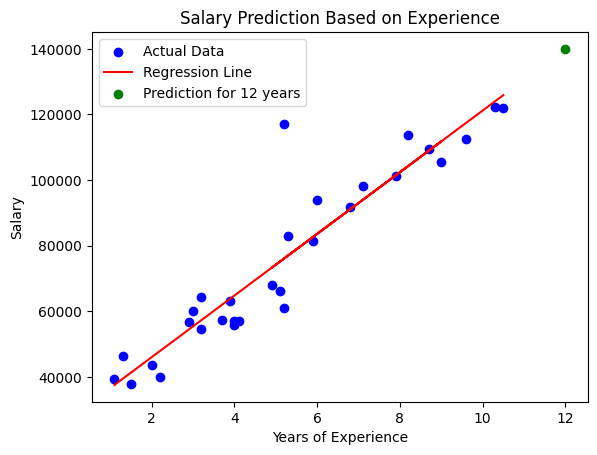

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Step 1: Load the dataset
df = pd.read_csv('salary.csv')
df['YearsExperience'].fillna(df['YearsExperience'].mean(),inplace=True)

# Step 2: Explore and preprocess the data (if needed)
# Check for missing values
print(df.isnull().sum())

# Check the first few rows to understand the structure
print(df.head())

# Assuming the dataset has 'YearsExperience' in the first column and 'Salary' in the second column
# Step 3: Prepare the data (X: Years of Experience, y: Salary)
X = df.iloc[:, 0].values.reshape(-1, 1)  # Years of Experience as a feature (reshape to 2D)
y = df.iloc[:, 1].values  # Salary as the target variable (1D)

# Step 4: Create and train the model
model = LinearRegression()
model.fit(X, y)

# Step 5: Predict salary for 12 years of experience
years_experience = np.array([[12]])  # Create a 2D array for 12 years of experience
predicted_salary = model.predict(years_experience)

# Output the result
print(f"Predicted salary for 12 years of experience: ${predicted_salary[0]:.2f}")

# Step 6: Plot the data and regression line
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.scatter(years_experience, predicted_salary, color='green', label=f'Prediction for 12 years')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary Prediction Based on Experience')
plt.legend()
plt.show()


       experience  test_score(out of 10)  interview_score(out of 10)  \
count    5.000000               5.000000                    5.000000   
mean     5.600000               7.800000                    8.200000   
std      3.577709               1.643168                    1.788854   
min      2.000000               6.000000                    6.000000   
25%      3.000000               7.000000                    7.000000   
50%      5.000000               7.000000                    8.000000   
75%      7.000000               9.000000                   10.000000   
max     11.000000              10.000000                   10.000000   

          salary($)  
count      5.000000  
mean   67400.000000  
std     7987.490219  
min    60000.000000  
25%    62000.000000  
50%    65000.000000  
75%    70000.000000  
max    80000.000000  
<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 2 to 7
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
-

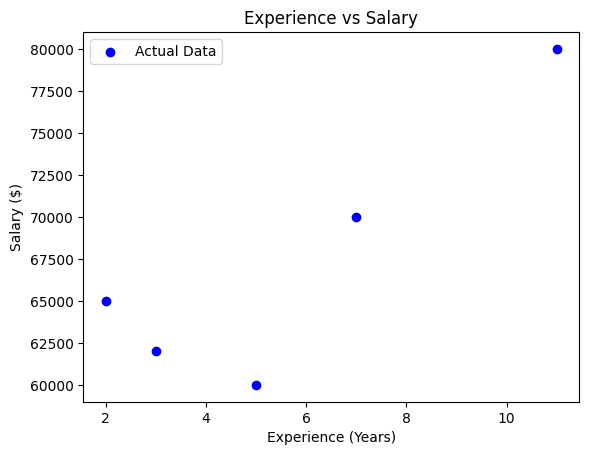

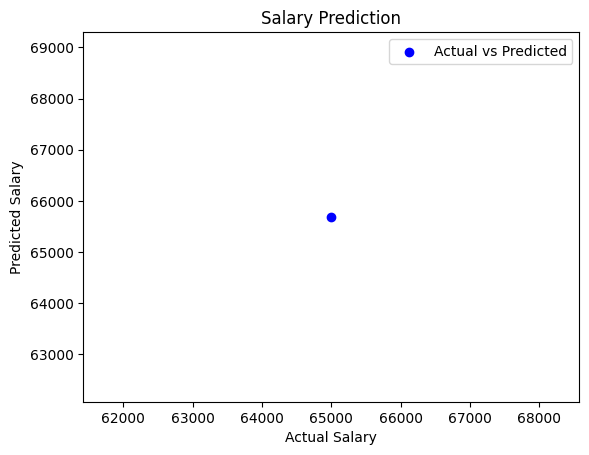

Coefficients: [2687.5 2125.  1750. ]
Intercept: 21562.500000000022
Predicted salary for 2 yrs experience, 9 test score, 6 interview score: 56562.50 US$
Predicted salary for 12 yrs experience, 10 test score, 10 interview score: 92562.50 US$
Mean Absolute Error (MAE): 687.50
Mean Squared Error (MSE): 472656.25
R-squared (R2) Score: nan


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv("hiring.csv")

# Function to convert experience from words to numbers
def convert_experience(value):
    word_to_num = {"zero": 0, "one": 1, "two": 2, "three": 3, "four": 4, "five": 5, "six": 6,
                   "seven": 7, "eight": 8, "nine": 9, "ten": 10, "eleven": 11, "twelve": 12}
    return word_to_num.get(value.lower(), value) if isinstance(value, str) else value

# Apply conversion
data['experience'] = data['experience'].apply(convert_experience)

# Handle missing values by removing rows with NaN
data = data.dropna()

# Convert all columns to numeric
data = data.astype(float)

# Analyze data distribution
print(data.describe())
print(data.info())

# Distribution plot visualization
plt.scatter(data['experience'], data['salary($)'], color='blue', label='Actual Data')
plt.xlabel("Experience (Years)")
plt.ylabel("Salary ($)")
plt.title("Experience vs Salary")
plt.legend()
plt.show()

# Relationship between variables
X = data[['experience', 'test_score(out of 10)', 'interview_score(out of 10)']]
y = data['salary($)']

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the results
y_pred = model.predict(X_test)

# Visualize prediction
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Salary Prediction")
plt.legend()
plt.show()

# Check values of coefficients and intercept
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")

# Predict salary for given candidates
candidates = np.array([[2, 9, 6], [12, 10, 10]])
salary_predictions = model.predict(candidates)
print(f"Predicted salary for 2 yrs experience, 9 test score, 6 interview score: {salary_predictions[0]:.2f} US$")
print(f"Predicted salary for 12 yrs experience, 10 test score, 10 interview score: {salary_predictions[1]:.2f} US$")

# Calculate errors
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

           R&D Spend  Administration  Marketing Spend         Profit  \
count    1000.000000     1000.000000      1000.000000    1000.000000   
mean    81668.927200   122963.897612    226205.058419  119546.164656   
std     46537.567891    12613.927535     91578.393542   42888.633848   
min         0.000000    51283.140000         0.000000   14681.400000   
25%     43084.500000   116640.684850    150969.584600   85943.198543   
50%     79936.000000   122421.612150    224517.887350  117641.466300   
75%    124565.500000   129139.118000    308189.808525  155577.107425   
max    165349.200000   321652.140000    471784.100000  476485.430000   

       State_Florida  State_New York  
count    1000.000000     1000.000000  
mean        0.322000        0.334000  
std         0.467477        0.471876  
min         0.000000        0.000000  
25%         0.000000        0.000000  
50%         0.000000        0.000000  
75%         1.000000        1.000000  
max         1.000000        1.000000  


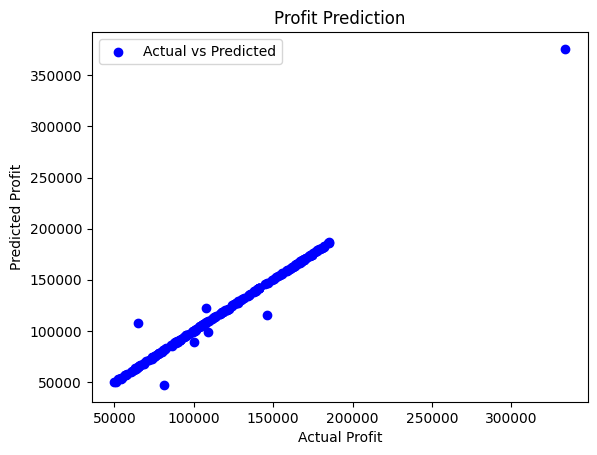

Coefficients: [ 5.33045605e-01  1.13893831e+00  8.30755037e-02 -8.74491486e+02
 -9.71337988e+01]
Intercept: -82439.15560711118
Predicted profit for given candidate: 554066.30 US$
Mean Absolute Error (MAE): 1404.44
Mean Squared Error (MSE): 30775142.86
R-squared (R2) Score: 0.98


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv("1000_Companies.csv")

# Handle missing values by removing rows with NaN
data = data.dropna()

# Encode categorical variable (State) using OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)
state_encoded = encoder.fit_transform(data[['State']])
state_encoded_df = pd.DataFrame(state_encoded, columns=encoder.get_feature_names_out(['State']))

# Concatenate encoded state data with original dataset
data = pd.concat([data.drop(['State'], axis=1), state_encoded_df], axis=1)

# Analyze data distribution
print(data.describe())
print(data.info())

# Define independent (X) and dependent (y) variables
X = data[['R&D Spend', 'Administration', 'Marketing Spend'] + list(state_encoded_df.columns)]
y = data['Profit']

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the results
y_pred = model.predict(X_test)

# Visualize prediction
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.xlabel("Actual Profit")
plt.ylabel("Predicted Profit")
plt.title("Profit Prediction")
plt.legend()
plt.show()

# Check values of coefficients and intercept
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")

# Predict profit for given candidate dynamically
state_names = encoder.get_feature_names_out(['State'])
florida_encoded = (state_names == "State_Florida").astype(int)
candidate_features = np.array([91694.48, 515841.3, 11931.24] + list(florida_encoded)).reshape(1, -1)
profit_prediction = model.predict(candidate_features)
print(f"Predicted profit for given candidate: {profit_prediction[0]:.2f} US$")

# Calculate errors
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

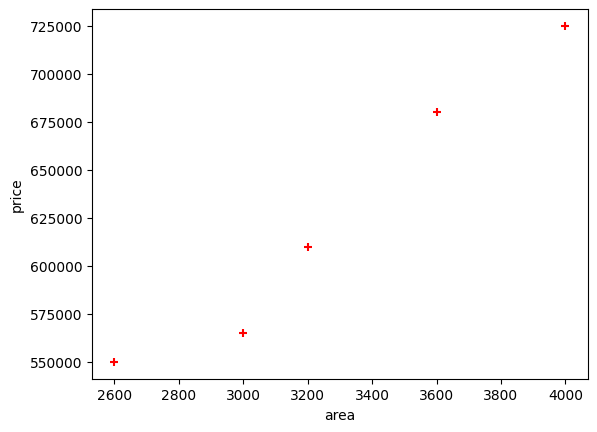

In [ ]:
# -*- coding: utf-8 -*-
"""Linear-Regression-Housing_Area_Price.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1CAlZml-P6V2V1RIrodgMfF8L3Ux4V9FT
"""

import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

df = pd.read_csv('/content/housing_area_price.csv')
df

# Commented out IPython magic to ensure Python compatibility.
# %matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='red',marker='+')

new_df = df.drop('price',axis='columns')
new_df

price = df.price
price

# Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(new_df,price)

"""(1) Predict price of a home with area = 3300 sqr ft"""

reg.predict([[3300]])

reg.coef_

reg.intercept_

"""Y = m * X + b (m is coefficient and b is intercept)"""

3300*135.78767123 + 180616.43835616432

"""(1) Predict price of a home with area = 5000 sqr ft"""

reg.predict([[5000]])

In [ ]:
# -*- coding: utf-8 -*-
"""Multiple_LR_HomePrice.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1fK78C8TPV44HdvT6lsMhaau2wMtKXquQ
"""

import pandas as pd
import numpy as np
from sklearn import linear_model

df = pd.read_csv('/content/homeprices_Multiple_LR.csv')
df

"""Data Preprocessing: Fill NA values with median value of a column"""

df.bedrooms.median()

df.bedrooms = df.bedrooms.fillna(df.bedrooms.median())
df

reg = linear_model.LinearRegression()
reg.fit(df.drop('price',axis='columns'),df.price)

reg.coef_

reg.intercept_

"""Find price of home with 3000 sqr ft area, 3 bedrooms, 40 year old"""

reg.predict([[3000, 3, 40]])

112.06244194*3000 + 23388.88007794*3 + -3231.71790863*40 + 221323.00186540384

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


498408.25157402386